<a href="https://colab.research.google.com/github/Aryanupadhyay23/XGBoost/blob/main/xgboost_regularization_FREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gamma

In [26]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib

# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=100, n_features=5, n_informative=2, noise=0.1, random_state=42)

# Train an XGBoost model for regression
model_reg = xgb.XGBRegressor(n_estimators=1, random_state=42)
model_reg.fit(X_reg, y_reg)

# Plot the tree with gain values explicitly shown
xgb.plot_tree(model_reg, num_trees=0, rankdir='LR', importance_type='gain')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)


/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


In [27]:
# Get the detailed dump of the tree, including statistics
tree_dump = model_reg.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)


0:[f1<-0.249036044] yes=1,no=2,missing=2,gain=195219.812,cover=100
	1:[f3<0.216458589] yes=3,no=4,missing=4,gain=83176.6875,cover=40
		3:[f0<-0.908024073] yes=7,no=8,missing=8,gain=3053.79688,cover=22
			7:leaf=-14.0634184,cover=4
			8:[f4<-0.808493614] yes=15,no=16,missing=16,gain=595.953125,cover=18
				15:leaf=-19.4130096,cover=6
				16:leaf=-33.610508,cover=12
		4:[f3<1.26691115] yes=9,no=10,missing=10,gain=12229.4033,cover=18
			9:[f1<-0.719844222] yes=17,no=18,missing=18,gain=3540.59961,cover=13
				17:[f0<2.0923872] yes=27,no=28,missing=28,gain=828.646973,cover=9
					27:[f3<0.955142319] yes=35,no=36,missing=36,gain=252.826172,cover=8
						35:leaf=-10.1232996,cover=7
						36:leaf=-2.0868659,cover=1
					28:leaf=-0.177689597,cover=1
				18:[f1<-0.401220471] yes=29,no=30,missing=30,gain=407.215027,cover=4
					29:[f0<-0.525755048] yes=37,no=38,missing=38,gain=23.1056824,cover=3
						37:leaf=3.70636344,cover=2
						38:leaf=0.796645939,cover=1
					30:leaf=-2.22502112,cover=1
		

### Shrinkage

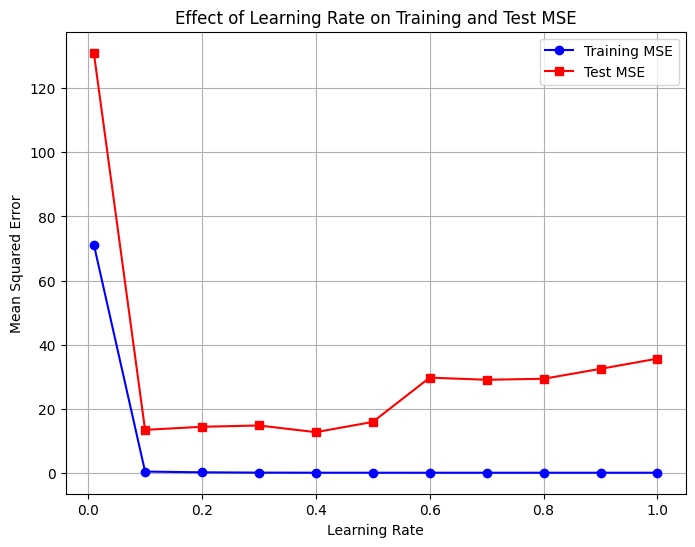

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=5, n_informative=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_mse_results = []
test_mse_results = []

for lr in learning_rates:
    model = xgb.XGBRegressor(max_depth=3, n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mse_results.append(train_mse)

    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mse_results.append(test_mse)

# Plotting learning rate against MSE for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_mse_results, marker='o', linestyle='-', color='b', label='Training MSE')
plt.plot(learning_rates, test_mse_results, marker='s', linestyle='-', color='r', label='Test MSE')
plt.title('Effect of Learning Rate on Training and Test MSE')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


### Lambda

In [29]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib

# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=100, n_features=5, n_informative=2, noise=0.1, random_state=42)

# Train an XGBoost model for regression
model_reg = xgb.XGBRegressor(max_depth=3, n_estimators=1, random_state=42, reg_lambda=0)
model_reg.fit(X_reg, y_reg)

# Plot the tree with gain values explicitly shown
xgb.plot_tree(model_reg, num_trees=0, rankdir='LR', importance_type='gain')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)


/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


In [30]:
# Get the detailed dump of the tree, including statistics
tree_dump = model_reg.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)


0:[f1<-0.249036044] yes=1,no=2,missing=2,gain=199446.391,cover=100
	1:[f3<0.216458589] yes=3,no=4,missing=4,gain=89346.5234,cover=40
		3:[f4<0.822544932] yes=7,no=8,missing=8,gain=14117.6562,cover=22
			7:leaf=-25.6513634,cover=18
			8:leaf=-45.3550529,cover=4
		4:[f3<1.26691115] yes=9,no=10,missing=10,gain=14107.0693,cover=18
			9:leaf=-5.94255209,cover=13
			10:leaf=12.8082247,cover=5
	2:[f3<-0.2257763] yes=5,no=6,missing=6,gain=90672.7109,cover=60
		5:[f1<0.821902514] yes=11,no=12,missing=12,gain=23259.0859,cover=22
			11:leaf=-10.3613796,cover=16
			12:leaf=11.5411015,cover=6
		6:[f3<1.13556564] yes=13,no=14,missing=14,gain=30580.9688,cover=38
			13:leaf=14.3808317,cover=27
			14:leaf=33.146347,cover=11



### Subsample

0.1 - 19064.026599086425
0.2 - 9647.933483261733
0.3 - 6771.643453951297
0.4 - 7044.448464148826
0.5 - 6208.417026798602
0.6 - 6437.276211227714
0.7 - 6278.9548954721695
0.8 - 7189.638831666092
0.9 - 5595.286042981959
1.0 - 6939.10613682803


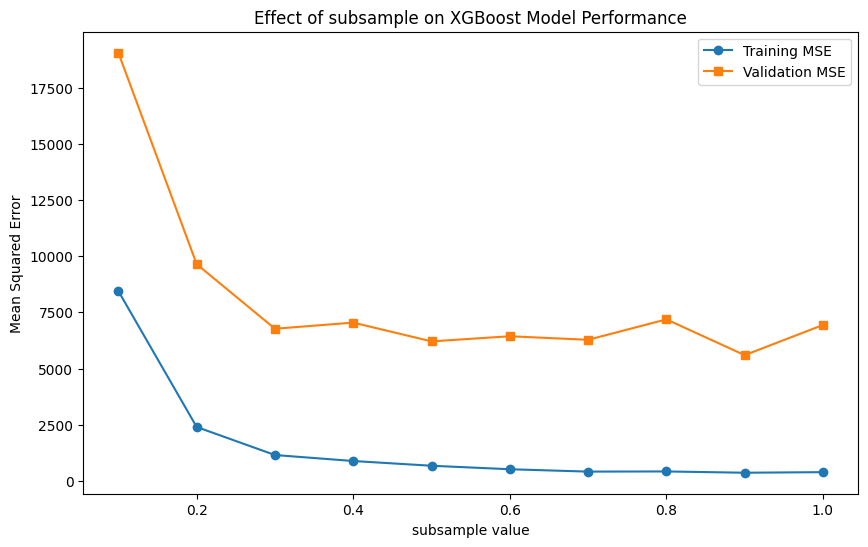

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

subsample_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Different subsample values to be tested
train_mse = []
val_mse = []

for subsample in subsample_values:
    model = xgb.XGBRegressor(objective='reg:squarederror', subsample=subsample, n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_val, y_val_pred))
    print(subsample,"-", mean_squared_error(y_val, y_val_pred))

# Plotting the MSE for different subsample values
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_mse, label='Training MSE', marker='o')
plt.plot(subsample_values, val_mse, label='Validation MSE', marker='s')
plt.title('Effect of subsample on XGBoost Model Performance')
plt.xlabel('subsample value')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


### Colsample_bytree

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=15, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bylevel=0.5, n_estimators=31, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Get the booster object
booster = model.get_booster()

# Initialize a list to hold the set of features used in each tree
features_in_trees = []

# Loop through each tree and extract feature names
for i, tree in enumerate(booster.get_dump()):
    print(f"Tree {i}:")
    features = set()
    for line in tree.split('\n'):
        if '<' in line or '>' in line:
            # Extract the feature name and add it to the set
            feature = line.split('[')[1].split('<')[0].strip()
            features.add(feature)
    features_in_trees.append(features)
    print(f"Features used: {features}\n")

# If you need to process the features further or analyze them, they are stored in features_in_trees


Tree 0:
Features used: {'f9', 'f2', 'f3'}

Tree 1:
Features used: {'f9', 'f3', 'f6'}

Tree 2:
Features used: {'f1', 'f3', 'f6'}

Tree 3:
Features used: {'f9', 'f6'}

Tree 4:
Features used: {'f2', 'f3', 'f6'}

Tree 5:
Features used: {'f9', 'f3', 'f0', 'f6'}

Tree 6:
Features used: {'f0', 'f3', 'f6', 'f9', 'f1'}

Tree 7:
Features used: {'f0', 'f3', 'f6', 'f2', 'f5'}

Tree 8:
Features used: {'f9', 'f1', 'f3', 'f0'}

Tree 9:
Features used: {'f9', 'f2', 'f1', 'f6'}

Tree 10:
Features used: {'f9', 'f1', 'f3', 'f0'}

Tree 11:
Features used: {'f0', 'f1', 'f8', 'f6'}

Tree 12:
Features used: {'f0', 'f2', 'f3', 'f7'}

Tree 13:
Features used: {'f9', 'f3', 'f0', 'f6'}

Tree 14:
Features used: {'f2', 'f3', 'f6', 'f1'}

Tree 15:
Features used: {'f6', 'f9', 'f2', 'f1', 'f5'}

Tree 16:
Features used: {'f9', 'f2', 'f0', 'f6'}

Tree 17:
Features used: {'f4', 'f0', 'f1', 'f3'}

Tree 18:
Features used: {'f3', 'f7', 'f6', 'f8'}

Tree 19:
Features used: {'f3', 'f9', 'f2', 'f1', 'f5'}

Tree 20:
Features used

In [33]:
# Get the detailed dump of the tree, including statistics
tree_dump = model.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)

0:[f3<0.277552515] yes=1,no=2,missing=2,gain=3336591.75,cover=800
	1:[f9<-0.192981362] yes=3,no=4,missing=4,gain=1273834.62,cover=481
		3:[f3<-0.860756814] yes=7,no=8,missing=8,gain=368276,cover=206
			7:leaf=-51.2106018,cover=70
			8:leaf=-24.1420517,cover=136
		4:[f3<-0.812402368] yes=9,no=10,missing=10,gain=490123.719,cover=275
			9:leaf=-18.2757149,cover=106
			10:leaf=7.64371252,cover=169
	2:[f9<-0.403287798] yes=5,no=6,missing=6,gain=842657.375,cover=319
		5:[f2<0.0327736363] yes=11,no=12,missing=12,gain=136276.156,cover=109
			11:leaf=-6.55809736,cover=64
			12:leaf=14.7846584,cover=45
		6:[f2<-0.815375626] yes=13,no=14,missing=14,gain=273142,cover=210
			13:leaf=11.7784224,cover=39
			14:leaf=39.9681931,cover=171

0:[f9<0.241802067] yes=1,no=2,missing=2,gain=1216153.75,cover=800
	1:[f3<-0.469346464] yes=3,no=4,missing=4,gain=943089.875,cover=481
		3:[f6<0.673181355] yes=7,no=8,missing=8,gain=482279,cover=157
			7:leaf=-38.8288307,cover=113
			8:leaf=-1.81023657,cover=44
		4:[f6

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models with different colsample_bytree values
for colsample_bytree in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=colsample_bytree, n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"colsample_bytree={colsample_bytree}: MSE = {mse}")

colsample_bytree=1.0: MSE = 7396.707194553807
colsample_bytree=0.9: MSE = 7960.833870883714
colsample_bytree=0.8: MSE = 8254.050469100719
colsample_bytree=0.7: MSE = 7604.943624098597
colsample_bytree=0.6: MSE = 6516.421916033237
colsample_bytree=0.5: MSE = 5888.7618240525735
colsample_bytree=0.4: MSE = 5823.743577872279
colsample_bytree=0.3: MSE = 5051.408284661753
colsample_bytree=0.2: MSE = 6269.641468515003
colsample_bytree=0.1: MSE = 8916.741236364114


### Early Stopping

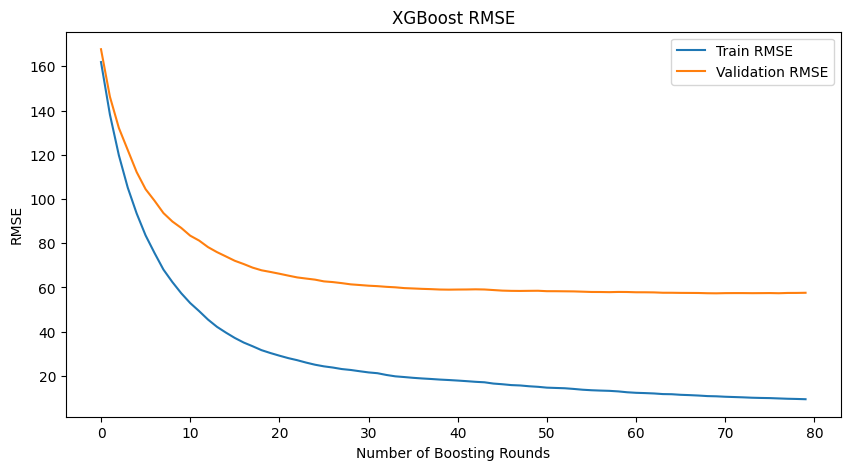

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, eta=0.3, n_estimators=1000, early_stopping_rounds=10)

# Fit the model with early stopping
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.title('XGBoost RMSE')
plt.show()

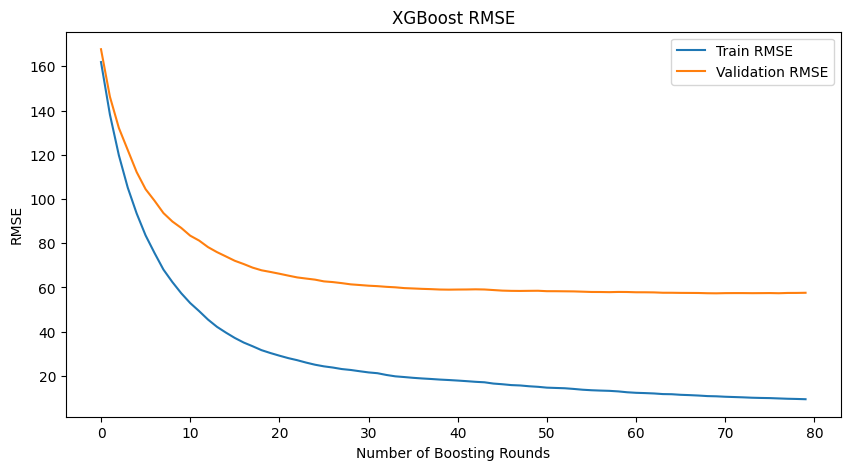

In [36]:
# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, eta=0.3, n_estimators=1000, early_stopping_rounds=10)

# Fit the model with early stopping
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.title('XGBoost RMSE')
plt.show()

In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
# baseline model

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.drop('medv', axis=1)  # Features
y = df['medv']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg.predict(X_test)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.6687594935356326
mse 24.291119474973478


In [41]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,crim,-0.114374
1,zn,-0.181510
2,indus,0.389192
3,chas,-1.008349
4,nox,-0.938023
5,rm,0.147907
6,age,1.362922
7,dis,-0.165778
8,rad,-0.134975
9,tax,-0.526450


In [42]:
reg = LinearRegression()

reg.fit(X_train_transformed, y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(X_test_transformed)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.7321931084363169
mse 19.639292514771263


In [44]:
# using XGBoost Baseline

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_pred = xgb.predict(X_test)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.9057837838492537
mse 6.909231565384943


In [46]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'lambda': [0.1, 1, 10],  # Also known as 'reg_lambda'
    'gamma': [0, 0.1, 0.5],
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.3],  # Also known as 'learning_rate'
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
}

# Initializing the XGBoost regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', verbosity=0)

# Setting up the grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fitting the grid search model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.5, 'eta': 0.3, 'gamma': 0.5, 'lambda': 10, 'max_depth': 3, 'subsample': 0.5}
Best score: -12.26001226948531


In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Generate a toy regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=1)
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df['Target'] = y

# Introduce random missing values (less than 5% in each feature)
for col in df.columns[:-1]:  # Exclude target column
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.869022,-1.593148,2.301561,-1.106284,0.990264,132.880021
1,-1.043400,1.320418,0.471534,0.956689,0.518969,-13.366442
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831,-8.637123
3,0.463217,0.475341,-0.688159,1.750722,0.565973,108.329759
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175,-18.626612


In [48]:
df.isnull().sum()

,0
Feature_1,50
Feature_2,50
Feature_3,50
Feature_4,50
Feature_5,50
Target,0


In [49]:
# Split the data into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model without imputation (XGBoost handles missing values)
model_default = XGBRegressor(max_depth=4, n_estimators=10, eta=0.1, objective='reg:squarederror')
model_default.fit(X_train, y_train)
preds_default = model_default.predict(X_test)
mse_default = mean_squared_error(y_test, preds_default)

print(f"MSE for default handling of missing values: {mse_default}")


MSE for default handling of missing values: 8831.930663169682
